### Step 0: Loading libraries and data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn.model_selection as cv
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

In [2]:
df_train = pd.read_csv("Data for Cleaning & Modeling.csv")
df_test = pd.read_csv("Holdout for Testing.csv")

C:\Users\mattk\anaconda3\envs\msca\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Creating a flag to identify test and train data
df_train["Test_Flag"] = 0
df_test["Test_Flag"] = 1

#Then appending the data so that cleaning and feature generation is applied uniformly
df = df_train.append(df_test)

### Step 1: Cleaning and preparing data

Taking a look at the first 5 records of every column

In [4]:
df.head().T

,0,1,2,3,4
X1,11.89%,10.71%,16.99%,13.11%,13.57%
X2,54734,55742,57167,57245,57416
X3,80364,114426,137225,138150,139635
X4,"$25,000","$7,000","$25,000","$1,200","$10,800"
X5,"$25,000","$7,000","$25,000","$1,200","$10,800"
X6,"$19,080",$673,"$24,725","$1,200","$10,692"
X7,36 months,36 months,36 months,36 months,36 months
X8,B,B,D,C,C
X9,B4,B5,D3,C2,C3
X10,NaN,CNN,Web Programmer,city of beaumont texas,State Farm Insurance


Looking at rows and column counts

In [5]:
df.shape

(480000, 33)

Checking frequency counts for each column to get a feel for the data

In [6]:
for col in df.columns:
    display(df[col].value_counts())

10.99%    11082
12.99%     9951
15.61%     9869
8.90%      9656
7.90%      8569
          ...  
16.01%        1
17.44%        1
18.72%        1
22.64%        1
18.36%        1
Name: X1, Length: 482, dtype: int64

41226252.0    1
42875140.0    1
12429337.0    1
22242694.0    1
4798128.0     1
             ..
1393998.0     1
22304010.0    1
22304063.0    1
22304081.0    1
40355978.0    1
Name: X2, Length: 479999, dtype: int64

395163.0      1
30595133.0    1
5010493.0     1
17792818.0    1
876617.0      1
             ..
5687296.0     1
5687306.0     1
5687316.0     1
5687321.0     1
25816248.0    1
Name: X3, Length: 479999, dtype: int64

$10,000    33797
$12,000    26512
$15,000    24323
$20,000    23865
$35,000    17524
           ...  
$33,675        1
$26,175        1
$30,775        1
$34,525        1
$33,475        1
Name: X4, Length: 1346, dtype: int64

$10,000    33704
$12,000    26421
$15,000    24211
$20,000    23684
$35,000    17386
           ...  
$32,150        1
$30,525        1
$34,450        1
$33,675        1
$34,525        1
Name: X5, Length: 1349, dtype: int64

$10,000    29476
$12,000    22690
$15,000    20291
$20,000    19139
$35,000    13952
           ...  
$13,685        1
$11,548        1
$9,760         1
$3,589         1
$22,446        1
Name: X6, Length: 7036, dtype: int64

 36 months    345999
 60 months    134000
Name: X7, dtype: int64

B    122977
C    112940
D     68611
A     67494
E     32222
F     11629
G      2857
Name: X8, dtype: int64

B3    28355
B4    27427
C1    24273
C2    24185
B2    23777
C3    22878
B5    22858
C4    21815
B1    20560
A5    20170
C5    19789
D1    17246
A4    17185
D2    15164
D3    13259
D4    12510
A3    11084
D5    10432
A2     9868
A1     9187
E1     8250
E2     7765
E3     6337
E4     5357
E5     4513
F1     3492
F2     2624
F3     2347
F4     1805
F5     1361
G1      967
G2      728
G3      519
G4      354
G5      289
Name: X9, dtype: int64

Teacher                                     5779
Manager                                     4687
Registered Nurse                            2369
RN                                          2306
Supervisor                                  2079
                                            ... 
Baptist Retirement                             1
Accuvant LABS                                  1
CUNY-CCNY                                      1
Education Link/First Choice Students Inc       1
Senior Iteration Manager                       1
Name: X10, Length: 208142, dtype: int64

10+ years    154783
2 years       42647
3 years       37869
< 1 year      37066
5 years       31860
1 year        30415
4 years       28638
7 years       26815
6 years       26447
8 years       23109
9 years       18431
Name: X11, dtype: int64

MORTGAGE    211106
RENT        169556
OWN          37816
OTHER          124
NONE            36
ANY              1
Name: X12, dtype: int64

60000.0     16057
50000.0     14242
65000.0     11830
40000.0     11608
70000.0     11152
            ...  
16722.0         1
102450.0        1
25613.0         1
102453.0        1
32769.0         1
Name: X13, Length: 29662, dtype: int64

VERIFIED - income           172001
VERIFIED - income source    158805
not verified                149193
Name: X14, dtype: int64

15-Jan    30830
Jul-14    29306
15-Mar    25400
15-Feb    23770
May-14    19099
          ...  
Aug-07       33
Sep-08       32
Jul-07       30
Sep-07       18
Jun-07        1
Name: X15, Length: 94, dtype: int64

                                                                                                                                                                                                                                                                                                                                                       225
  Borrower added on 03/17/14 > Debt consolidation<br>                                                                                                                                                                                                                                                                                                   11
Debt Consolidation                                                                                                                                                                                                                                                                                                

debt_consolidation    283678
credit_card           108144
home_improvement       27060
other                  23544
major_purchase          9896
small_business          6955
car                     5434
medical                 4554
moving                  2955
vacation                2518
house                   2298
wedding                 2288
renewable_energy         350
educational              325
Name: X17, dtype: int64

Debt consolidation                       174609
Credit card refinancing                   66632
Debt Consolidation                        15692
Home improvement                          15562
Other                                     13002
                                          ...  
private practice                              1
My moving fees                                1
Credit Card Refinancing and Personal          1
FINAL RUN FROM DEBT                           1
Renovation for bath                           1
Name: X18, Length: 61636, dtype: int64

945xx    5516
750xx    5193
112xx    5150
606xx    4758
100xx    4449
         ... 
511xx       1
568xx       1
689xx       1
889xx       1
504xx       1
Name: X19, Length: 889, dtype: int64

CA    73647
NY    40747
TX    37867
FL    32334
IL    18979
NJ    18350
PA    16835
OH    15636
GA    15366
VA    14547
NC    13262
MI    12034
MD    11271
MA    11219
AZ    11064
WA    11064
CO    10196
MN     8563
MO     7725
CT     7255
IN     6821
NV     6782
TN     6270
OR     6269
WI     6179
AL     5991
LA     5771
SC     5631
KY     4533
KS     4416
OK     4320
UT     3519
AR     3517
NM     2664
HI     2560
WV     2466
NH     2269
RI     2106
DC     1457
MT     1441
DE     1315
AK     1310
MS     1278
WY     1191
SD     1020
VT      914
ID        9
NE        8
IA        7
ME        4
Name: X20, dtype: int64

14.40    407
19.20    391
18.00    378
12.00    370
16.80    360
        ... 
39.19      2
39.47      2
39.59      1
0.10       1
36.14      1
Name: X21, Length: 3999, dtype: int64

0.0     394222
1.0      57826
2.0      16831
3.0       5817
4.0       2481
5.0       1263
6.0        675
7.0        346
8.0        190
9.0        115
10.0        79
11.0        40
12.0        37
13.0        17
14.0        17
15.0        14
18.0         7
16.0         7
17.0         6
19.0         4
29.0         1
21.0         1
22.0         1
20.0         1
24.0         1
Name: X22, dtype: int64

Oct-00    3721
Aug-00    3688
Oct-99    3472
Nov-99    3421
Sep-00    3360
          ... 
Oct-54       1
Jul-61       1
Jul-62       1
Feb-60       1
Dec-51       1
Name: X23, Length: 799, dtype: int64

0.0    251371
1.0    134167
2.0     58853
3.0     25502
4.0      6712
5.0      2389
6.0       929
7.0        53
8.0        23
Name: X24, dtype: int64

12.0     4424
13.0     4392
9.0      4345
8.0      4283
14.0     4270
         ... 
151.0       1
176.0       1
149.0       1
143.0       1
126.0       1
Name: X25, Length: 147, dtype: int64

112.0    1066
113.0    1059
106.0     999
111.0     985
104.0     970
         ... 
2.0        31
1.0        29
120.0       4
121.0       2
129.0       1
Name: X26, Length: 123, dtype: int64

9.0     45290
10.0    43677
8.0     42946
11.0    40354
7.0     38426
        ...  
61.0        1
60.0        1
56.0        1
79.0        1
55.0        1
Name: X27, Length: 65, dtype: int64

0.0     415675
1.0      55306
2.0       6048
3.0       1751
4.0        585
5.0        315
6.0        155
7.0         67
8.0         34
9.0         21
10.0        14
11.0         8
13.0         4
12.0         3
17.0         2
15.0         1
34.0         1
14.0         1
22.0         1
21.0         1
40.0         1
16.0         1
18.0         1
49.0         1
54.0         1
63.0         1
Name: X28, dtype: int64

0.0        2184
5853.0       43
6223.0       43
5365.0       42
7429.0       42
           ... 
76258.0       1
84585.0       1
52800.0       1
38181.0       1
45422.0       1
Name: X29, Length: 58260, dtype: int64

0%         2241
53%         894
58%         878
57%         875
61%         873
           ... 
108.30%       1
114.40%       1
116.80%       1
110.50%       1
37.73%        1
Name: X30, Length: 1271, dtype: int64

22.0     17668
20.0     17648
21.0     17578
19.0     17235
23.0     17146
         ...  
121.0        1
113.0        1
112.0        1
117.0        1
118.0        1
Name: X31, Length: 113, dtype: int64

f    314753
w    165246
Name: X32, dtype: int64

0    400000
1     80000
Name: Test_Flag, dtype: int64

Drop a few columns that aren't going to be useful. X2 and X3 are identifiers (per the metadata). Dropping X9 and hoping the X8 has captures enough of the separation to be predictive. X10 has too many levels and doesn't need itself to easy clustering. X16 needs to be text mined. X18 has too many categories, and it looks like it's coded up into the much neater X17 variable. Dropping X19 since there's too many zip code levels. Hoping the state field captures any geographic signal. It'll be interesting (in a longer analysis) to code some variables off of the zip code, like rural/suburban/urban. 

In [7]:
df = df.drop(["X2", "X3", "X9", "X10", "X16", "X18", "X19"], axis = 1)

Reformating various columns to numeric or date formats where appropriate

In [8]:
#Removing % signs from end of string and reformating as numbers 
df["X1"] = pd.to_numeric(df["X1"].str[:-1])/100
df["X30"] = pd.to_numeric(df["X30"].str[:-1])/100

#Removing commas and dollar signs from dollar amounts
df["X4"] = pd.to_numeric(df["X4"].str.replace(',', '').str[1:])
df["X5"] = pd.to_numeric(df["X5"].str.replace(',', '').str[1:])
df["X6"] = pd.to_numeric(df["X6"].str.replace(',', '').str[1:])

#Dropping the "months" from the loan length entries
df["X7"] = df["X7"].str[:3]

#Converting the number of years employed to a number (capped from at a max of 10)
df["X11"] = np.where(df["X11"] == "< 1 year", "0", df["X11"])
df["X11"] = pd.to_numeric(df["X11"].str[:2])

#Formating the dates. First I strip out the month and year, and then put them together in a datetime variable
df["X15_year"] = df["X15"].str.extract('(\d+)')
df["X15_month"] = df["X15"].str.replace('[^a-zA-Z]', '')

df["X15"] = pd.to_datetime(df['X15_year'].astype(str) + df['X15_month'].astype(str) + '1', format = "%y%b%d", errors='coerce')

df["X23_year"] = df["X23"].str.extract('(\d+)')
df.loc[df.X23_year.str.len()==1, "X23_year"] = '0' + df.loc[df.X23_year.str.len()==1, "X23_year"].astype(str)
df["X23_month"] = df["X23"].str.replace('[^a-zA-Z]', '')

df["X23"] = pd.to_datetime(df['X23_year'].astype(str) + df['X23_month'].astype(str) + '1', format = "%y%b%d", errors='coerce')

df = df.drop(["X15_month", "X15_year", "X23_month", "X23_year"], axis = 1)

Taking a look at the data now that we've cleaned it some

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,338990.0,0.139463,0.043780,0.0542,0.1099,0.1368,0.1678,2.606000e-01
X4,479999.0,14444.116550,8291.786120,500.0000,8000.0000,12375.0000,20000.0000,3.500000e+04
X5,479999.0,14420.530459,8280.239635,500.0000,8000.0000,12300.0000,20000.0000,3.500000e+04
X6,479999.0,14367.640095,8292.694530,0.0000,8000.0000,12200.0000,20000.0000,3.500000e+04
X11,458080.0,5.999249,3.626972,0.0000,3.0000,6.0000,10.0000,1.000000e+01
X13,418972.0,73545.906313,56997.077922,3000.0000,45000.0000,63000.0000,89000.0000,8.706582e+06
X21,479999.0,17.356465,7.901590,0.0000,11.4600,16.9900,22.9400,3.999000e+01
X22,479999.0,0.285584,0.803326,0.0000,0.0000,0.0000,0.0000,2.900000e+01
X24,479999.0,0.777712,1.034215,0.0000,0.0000,0.0000,1.0000,8.000000e+00
X25,222494.0,34.206086,21.794415,0.0000,16.0000,31.0000,50.0000,1.880000e+02


Plotting histograms of all of the numeric variables

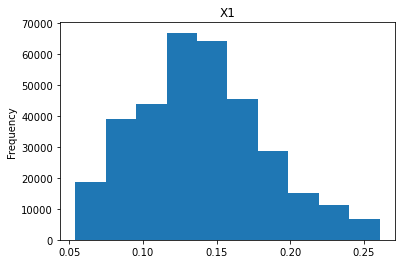

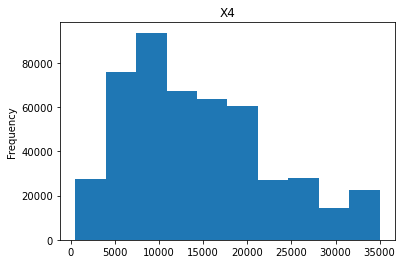

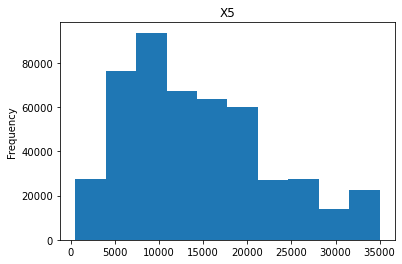

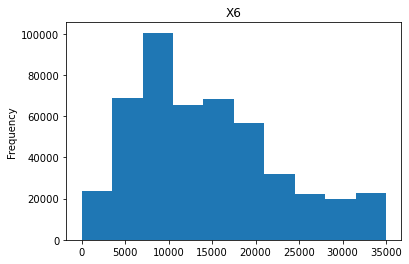

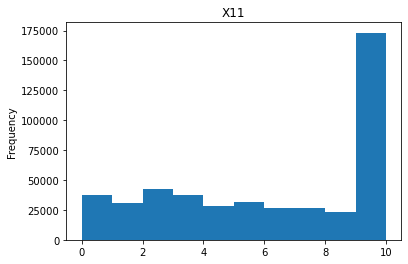

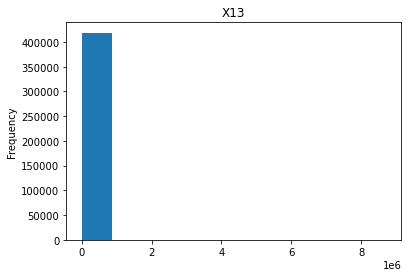

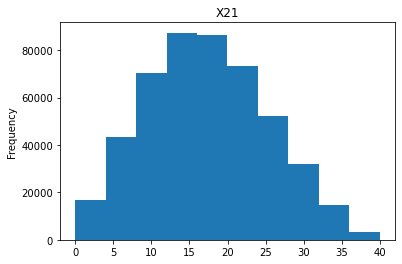

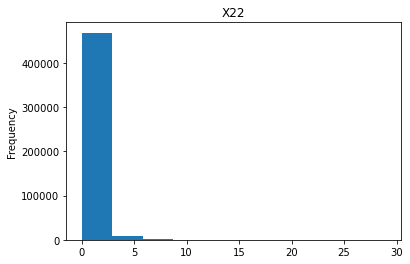

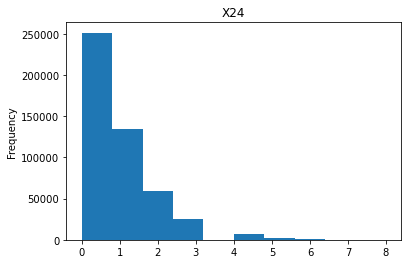

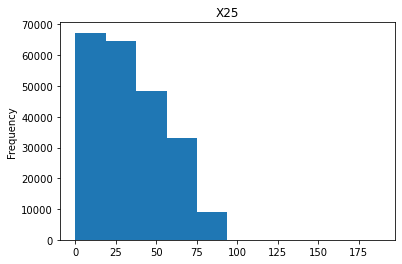

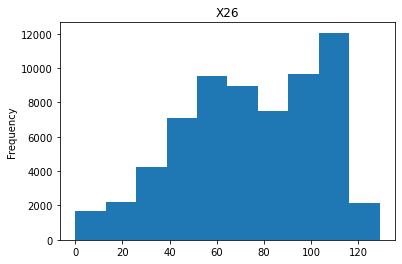

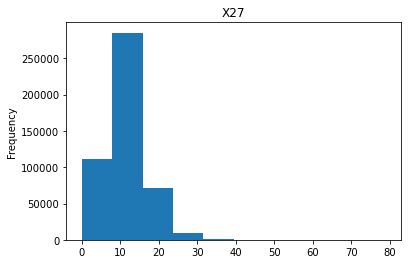

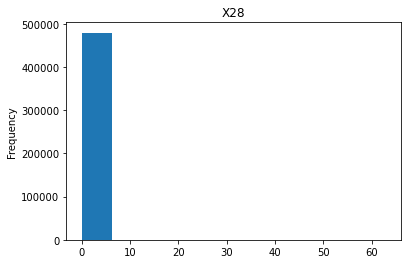

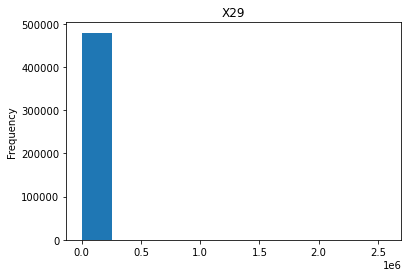

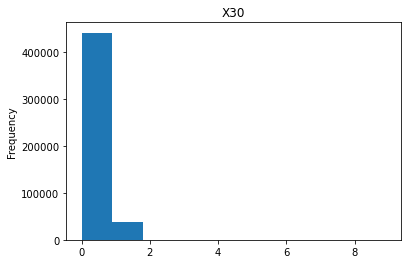

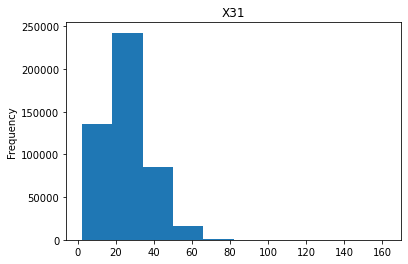

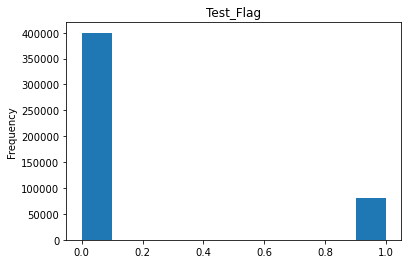

In [10]:
for col in df.select_dtypes(exclude=['object', 'datetime']).columns:
    df[col].plot(kind = 'hist', title = col)
    plt.show()

Plotting frequency charts for all of the categorical variables

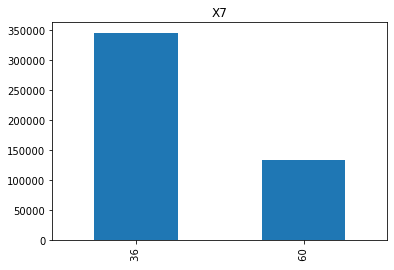

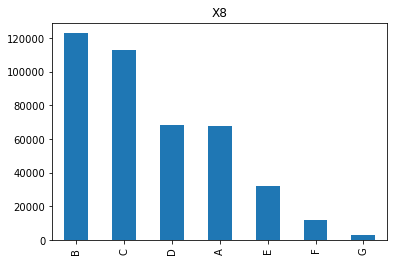

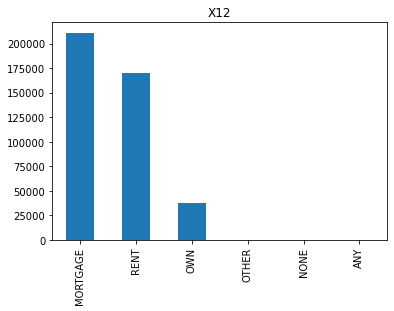

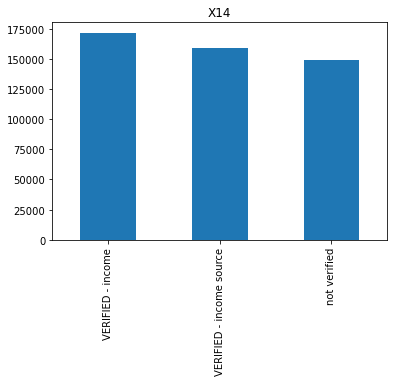

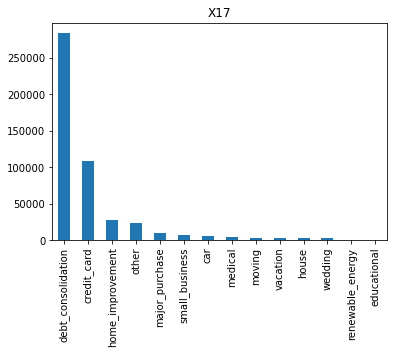

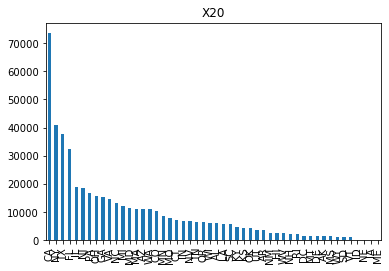

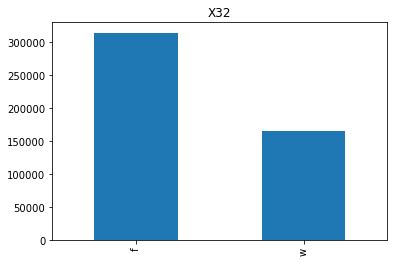

In [11]:
for col in df.select_dtypes(include=['object']).columns:
    df[col].value_counts().plot(kind = 'bar', title = col)
    plt.show()

Plotting distribution by year for the date variables

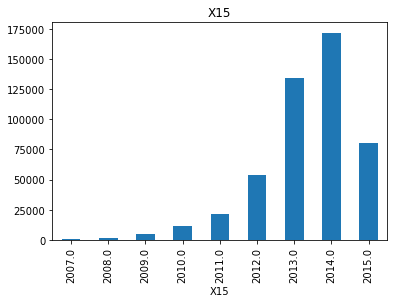

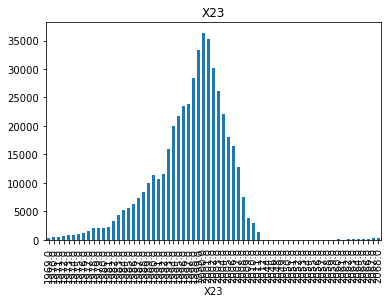

In [12]:
for col in df.select_dtypes(include=['datetime']).columns:
    df[col].groupby(df[col].dt.year).count().plot(kind="bar", title = col)
    plt.show()

Checking if we have any missing variables

In [13]:
df.isnull().sum()

X1           141010
X4                1
X5                1
X6                1
X7                1
X8            61270
X11           21920
X12           61361
X13           61028
X14               1
X15               1
X17               1
X20               1
X21               1
X22               1
X23               1
X24               1
X25          257506
X26          415006
X27               1
X28               1
X29               1
X30             297
X31               1
X32               1
Test_Flag         0
dtype: int64

Cleaning up all of the missings. See notes next to each variable for the decision and rationale

In [14]:
#Getting rid of the one row with no supporting data
df = df[df.X4.notnull()]

#Getting rid of the rows that have no target variable
df = df[df.X1.notnull() | df.Test_Flag == 1]

#Filling in missings in the loan grade category with a "missing" level
df["X8"] = df["X8"].fillna("X")

#Filling in missings in the years employed column with the mean and adding a years employed missing flag
df["X11_missing"] = np.where(df.X11.isnull(), 1, 0)
df["X11"] = df["X11"].fillna(df["X11"].mean())

#Grouping small levels in the "Other" category. Making a new missing category
df["X12"] = np.where(df["X12"].isin(["OTHER", "NONE", "ANY"]), "OTHER", df["X12"])
df["X12"] = df["X12"].fillna("missing")

#Filling in missings in the annual income column with the mean and adding a annual income missing flag
df["X13_missing"] = np.where(df.X13.isnull(), 1, 0)
df["X13"] = df["X13"].fillna(df["X13"].mean())

#Filling in missings in the X25 column with the mean and adding a X25 missing flag
df["X25_missing"] = np.where(df.X25.isnull(), 1, 0)
df["X25"] = df["X25"].fillna(df["X25"].mean())

#Filling in missings in the X26 column with the mean and adding a X26 missing flag
df["X26_missing"] = np.where(df.X26.isnull(), 1, 0)
df["X26"] = df["X26"].fillna(df["X26"].mean())

#Getting rid of the rows where X30 is null. It's only ~200 so it shouldn't impact much
df = df[df.X30.notnull()]

Checking that we got them all

In [15]:
df.isnull().sum()

X1             79970
X4                 0
X5                 0
X6                 0
X7                 0
X8                 0
X11                0
X12                0
X13                0
X14                0
X15                0
X17                0
X20                0
X21                0
X22                0
X23                0
X24                0
X25                0
X26                0
X27                0
X28                0
X29                0
X30                0
X31                0
X32                0
Test_Flag          0
X11_missing        0
X13_missing        0
X25_missing        0
X26_missing        0
dtype: int64

New shape. We dropped ~61k records total, but all but ~300 of those were from training set data with an missing target variable. 

In [16]:
df.shape

(418735, 30)

### Step 2: Building the model

In [17]:
#After testing some models below, I've decided to drop the state variable. It saves me 50 features in the data 
# and it didn't appear important in any of the initial model runs. Intuitively it also makes sense that there are
# more important predictors of interest rate than the state you reside in
df = df.drop("X20", axis = 1)

#Grouping some categorical levels to improve runtimes. These levels don't compose major parts of the record distribution
# didn't play a major role in initial model runs

df["X12"] = np.where(df.X12.isin(["ANY", "NONE"]), "OTHER", df.X12)
df["X17"] = np.where(df.X17.isin(['moving', 'medical', 'house', 'renewable_energy', 
                                  'small_business', 'vacation', 'wedding', 'educational']), "other", df.X17)

In [18]:
#Saving just the year from both date variables. Likely some noise from the recession in X15, but the vast majority of
# the data is post 2011. 
df["X15"] = pd.DatetimeIndex(df['X15']).year
df["X23"] = pd.DatetimeIndex(df['X15']).year

In [19]:
#Capping some of my very skewed numeric fields
df["X22"] = df.X22.clip(upper = 5)
df["X28"] = df.X28.clip(upper = 5)

df["X29"] = df.X29.clip(upper = df.X29.quantile(q=.98))
df["X30"] = df.X30.clip(upper = df.X30.quantile(q=.98))

In [20]:
#Breaking out categorical variables into dummies capturing each level
for col in ["X7", "X8", "X12", "X14", "X17", "X32"]:
    df = pd.concat([df.drop(col, axis = 1), pd.get_dummies(df[col], prefix = col)], axis=1)

In [21]:
df.shape

(418735, 49)

Creating my train and test datasets

In [23]:
x_train = df.loc[df.Test_Flag == 0, df.columns != 'X1']
y_train = df.loc[df.Test_Flag == 0, 'X1']

x_test = df.loc[df.Test_Flag == 1, df.columns != 'X1']
y_test = df.loc[df.Test_Flag == 1, 'X1'] #Although this is literally all NA, so don't really need it

Creating a Decision Tree Model

In [24]:
# Instantiate dt
dt = DecisionTreeRegressor(max_depth=None,
                           min_samples_leaf=0.03,
                           random_state=3)

# Fit dt to the training set
dt.fit(x_train, y_train)

# Predict the labels of the training set
y_pred_train = dt.predict(x_train)

# Predict the labels of the test set
y_pred_test = dt.predict(x_test)

In [25]:
MSE_CV_scores = - cross_val_score(dt, x_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.5f}'.format(RMSE_CV))

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.5f}'.format(RMSE_train))

CV RMSE: 0.02130
Train RMSE: 0.02125


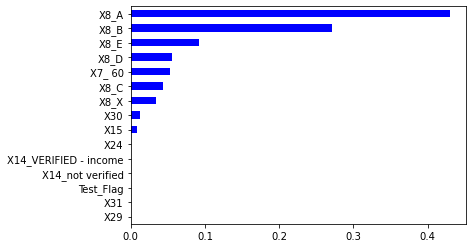

In [26]:
# Create a pd.Series of features importances
importances_dt = pd.Series(dt.feature_importances_, index = x_train.columns)
# Sort importances_dt
sorted_importances_dt = importances_dt.sort_values().tail(15)
# Make a horizontal bar plot
sorted_importances_dt.plot(kind='barh', color='blue')
plt.show()

Creating a bagged decision tree model

In [59]:
# Instantiate a decision tree regressor 'dt'
dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=0.1, random_state=16)

# Instantiate a BaggingRegressor 'br'
br = BaggingRegressor(base_estimator=dt, n_estimators=50, n_jobs=-1)

# Fit 'br' to the training set
br.fit(x_train, y_train)

# Predict the labels of the training set
y_pred_train = br.predict(x_train)

# Predict the labels of the test set
y_pred_test = br.predict(x_test)

In [60]:
MSE_CV_scores = - cross_val_score(br, x_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.5f}'.format(RMSE_CV))

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.5f}'.format(RMSE_train))

CV RMSE: 0.03739
Train RMSE: 0.03719


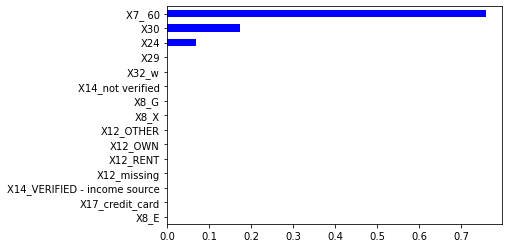

In [84]:
# Create a pd.Series of features importances
importances_br = pd.Series(np.mean([tree.feature_importances_ for tree in br.estimators_], axis=0), index = x_train.columns)
# Sort importances_br
sorted_importances_br = importances_br.sort_values().tail(15)
# Make a horizontal bar plot
sorted_importances_br.plot(kind='barh', color='blue')
plt.show()

Trying out a random forest

In [27]:
# Instantiate a random forests regressor 'rf' 100 estimators
rf = RandomForestRegressor(n_estimators=100, min_samples_leaf=0.05, max_depth = 8, random_state=100)

# Fit 'br' to the training set
rf.fit(x_train, y_train)

# Predict the labels of the training set
y_pred_train = rf.predict(x_train)

# Predict the labels of the test set
y_pred_test = rf.predict(x_test)

In [28]:
MSE_CV_scores = - cross_val_score(rf, x_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.5f}'.format(RMSE_CV))

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.5f}'.format(RMSE_train))

C:\Users\mattk\anaconda3\envs\msca\lib\site-packages\joblib\externals\loky\process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


CV RMSE: 0.02139
Train RMSE: 0.02106


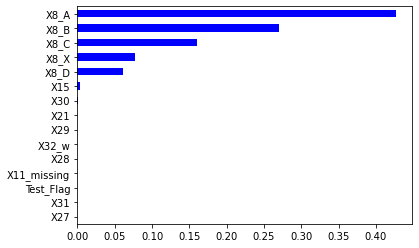

In [29]:
# Create a pd.Series of features importances
importances_rf = pd.Series(rf.feature_importances_, index = x_train.columns)
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values().tail(15)
# Make a horizontal bar plot
sorted_importances_rf.plot(kind='barh', color='blue')
plt.show()

Lastly, trying out a gradient boosting regressor

In [30]:
# Instantiate gb
gb = GradientBoostingRegressor(max_depth=3, random_state=2)

# Fit 'gb' to the training set
gb.fit(x_train, y_train)

# Predict the labels of the training set
y_pred_train = gb.predict(x_train)

# Predict the labels of the test set
y_pred_test = gb.predict(x_test)

In [31]:
MSE_CV_scores = - cross_val_score(gb, x_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.5f}'.format(RMSE_CV))

# Evaluate the training set RMSE of dt
RMSE_train = (MSE(y_train, y_pred_train))**(1/2)

# Print RMSE_train
print('Train RMSE: {:.5f}'.format(RMSE_train))

CV RMSE: 0.01703
Train RMSE: 0.01586


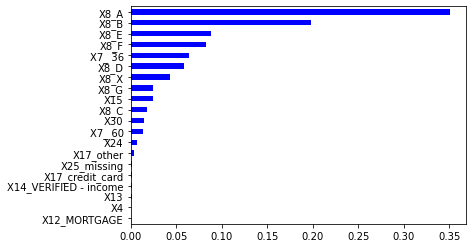

In [32]:
# Create a pd.Series of features importances
importances_gb = pd.Series(gb.feature_importances_, index = x_train.columns)
# Sort importances_gb
sorted_importances_gb = importances_gb.sort_values().tail(20)
# Make a horizontal bar plot
sorted_importances_gb.plot(kind='barh', color='blue')
plt.show()

### Step 3: Test the model

### Step 4: Prep for submission